# Análisis de los útimos 10 años del Clima en Chile

**Autor: Ricardo Urdaneta**

**Fecha: 13 de Agosto de 2025**

---

Este proyecto realiza un análisis completo de los datos meteorológicos históricos de las 16 capitales regionales de Chile durante la última década (2015-2025). 

El objetivo es transformar datos crudos, obtenidos de la API de Open-Meteo, en insights visuales y accesibles. El proceso abarca desde la extracción y limpieza de los datos, pasando por un profundo Análisis Exploratorio de Datos (EDA) para descubrir patrones, tendencias y anomalías, hasta la construcción y despliegue de un dashboard web interactivo que permite a cualquier usuario explorar el comportamiento del clima en el país.

---


#### Metodología y Fases del Proyecto


1. **Extracción de Datos**:

Se desarrolló un script en Python para conectarse a la API de Open-Meteo.

Se extrajeron datos diarios de temperatura máxima, temperatura mínima, precipitación y velocidad del viento para las 16 capitales regionales de Chile, abarcando un período de 10 años.

El resultado fue un dataset limpio y estructurado en un archivo CSV, listo para el análisis.

2. **Análisis Exploratorio de Datos (EDA)**:

Utilizando las librerías Pandas, Matplotlib y Seaborn, se llevó a cabo un análisis exhaustivo del dataset.

Se investigaron las distribuciones de las variables, los patrones estacionales, las tendencias a largo plazo, las correlaciones y se detectaron eventos extremos como olas de calor.

Esta fase fue crucial para formular las preguntas correctas y definir qué visualizaciones serían más impactantes en el dashboard final.

3. **Dashboard Interactivo**:

Se construyó una aplicación web utilizando Dash, el framework de Python para visualizaciones analíticas.

Se empleó Plotly Express para los gráficos dinámicos y Dash Bootstrap Components para crear un diseño moderno, profesional y responsive.

La aplicación final incluye múltiples filtros interactivos, tarjetas de KPIs, un mapa geoespacial y diversos gráficos que se actualizan en tiempo real según la selección del usuario.

4. **Despliegue en la Nube**:

La aplicación de Dash fue preparada para producción utilizando un servidor Gunicorn.

Se configuraron los archivos necesarios (requirements.txt, Procfile) y el proyecto fue subido a un repositorio de GitHub.

Finalmente, la aplicación se desplegó en la plataforma Render, haciéndola pública y accesible a través de una URL.

---
#### Conclusión
El análisis reveló claras diferencias climáticas a lo largo del territorio chileno, desde la consistencia del clima desértico en el norte hasta la marcada estacionalidad y variabilidad en el sur. Se identificaron tendencias y anomalías mensuales específicas que sirvieron de base para las funcionalidades del dashboard. El proyecto culminó con éxito en una herramienta web robusta que no solo visualiza datos, sino que permite una exploración personal y detallada, demostrando el poder de un ciclo de vida de datos.

---


#### Preparación del ambiente

In [33]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import joypy
import warnings
warnings.filterwarnings("ignore")   

# Configuración para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7)

#### Carga de datos e inspeccion inicial

In [34]:
# Cargar los datos
df = pd.read_csv('data/datos_climaticos_chile_10_anios.csv')

# Inspección inicial
print("--- Información General ---")
df.info()

print("\n--- Primeras 5 Filas ---")
print(df.head())

print("\n--- Resumen Estadístico ---")
print(df.describe())

--- Información General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60742 entries, 0 to 60741
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ciudad            60742 non-null  object 
 1   fecha             60742 non-null  object 
 2   temp_max_c        60742 non-null  float64
 3   temp_min_c        60742 non-null  float64
 4   precipitacion_mm  60742 non-null  float64
 5   viento_max_kmh    60742 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.8+ MB

--- Primeras 5 Filas ---
  ciudad       fecha  temp_max_c  temp_min_c  precipitacion_mm  viento_max_kmh
0  Arica  2015-01-01        26.8        18.2               0.0            19.9
1  Arica  2015-01-02        24.9        18.6               0.0            18.4
2  Arica  2015-01-03        25.3        18.5               0.0            18.6
3  Arica  2015-01-04        25.7        18.6               0.0            18.1
4  Arica  2015-

#### Convertir `fecha` a formato datetime

In [8]:
# Convertir la columna 'fecha' al formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear nuevas columnas para facilitar el análisis
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia_del_año'] = df['fecha'].dt.dayofyear

# Verificar los cambios
print(df.head())

  ciudad      fecha  temp_max_c  temp_min_c  precipitacion_mm  viento_max_kmh  \
0  Arica 2015-01-01        26.8        18.2               0.0            19.9   
1  Arica 2015-01-02        24.9        18.6               0.0            18.4   
2  Arica 2015-01-03        25.3        18.5               0.0            18.6   
3  Arica 2015-01-04        25.7        18.6               0.0            18.1   
4  Arica 2015-01-05        26.4        19.1               0.0            19.5   

    año  mes  dia_del_año  
0  2015    1            1  
1  2015    1            2  
2  2015    1            3  
3  2015    1            4  
4  2015    1            5  


#### Heatmap de correlación por cada ciudad

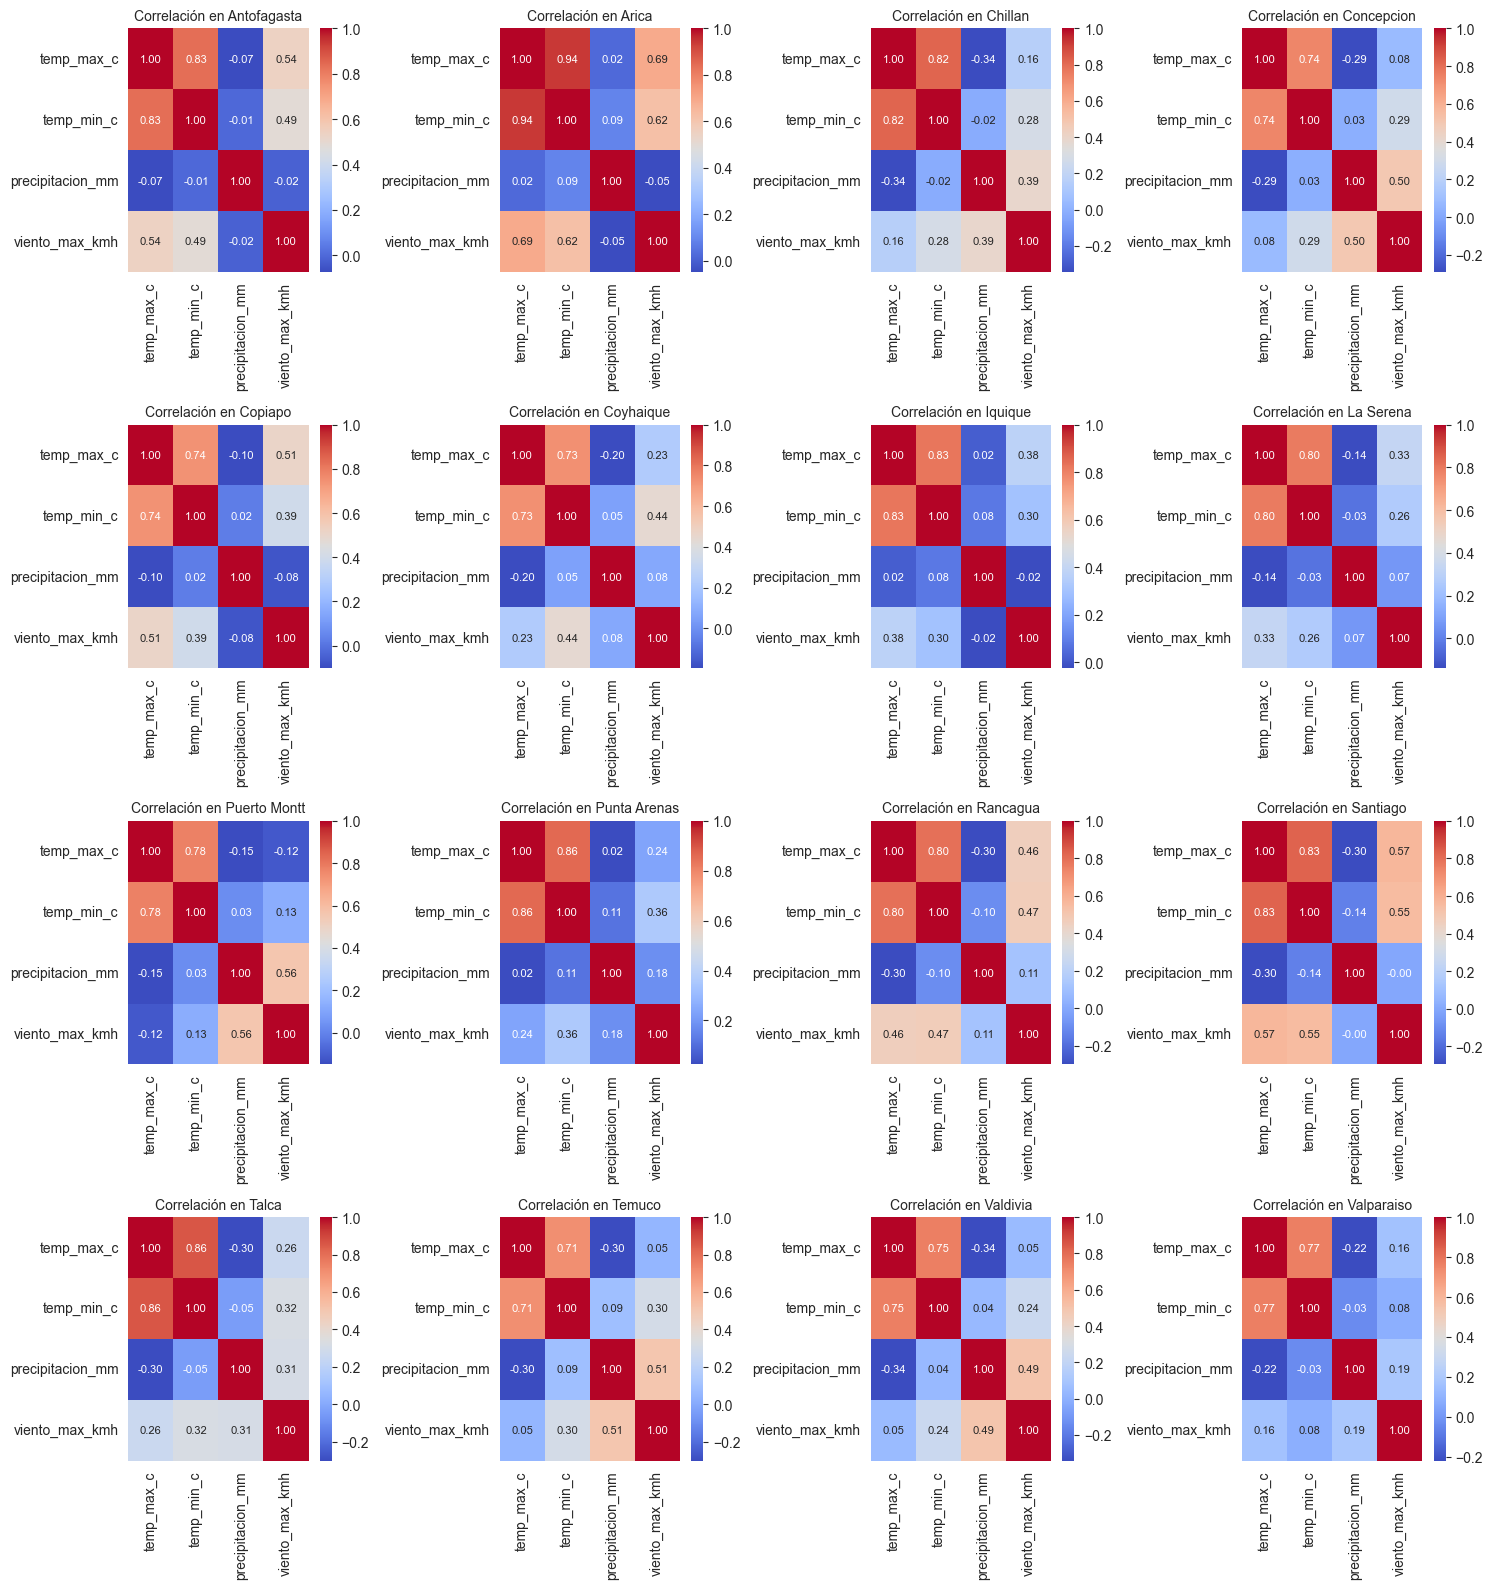

In [24]:
# Lista de ciudades únicas
ciudades = sorted(df['ciudad'].unique())
num_ciudades = len(ciudades)

#  Configuración
cols = 4
rows = math.ceil(num_ciudades / cols)

# Crea la figura y los ejes (subplots) para la grilla
# figsize controla el tamaño total de la imagen
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
# 'axes.flatten()' convierte la matriz de ejes (ej. 4x4) en una lista simple para iterar fácilmente
axes = axes.flatten()

# Bucle para generar cada heatmap 
for i, ciudad in enumerate(ciudades):
    ax = axes[i] # Selecciona el subplot actual
    
    # Filtra el DataFrame para la ciudad actual
    df_ciudad = df[df['ciudad'] == ciudad]
    
    # Selecciona solo las columnas numéricas
    df_numeric = df_ciudad[['temp_max_c', 'temp_min_c', 'precipitacion_mm', 'viento_max_kmh']]
    
    # Calcula la matriz de correlación
    correlation_matrix = df_numeric.corr()
    
    # Dibuja el heatmap en el subplot 'ax'
    sns.heatmap(
        correlation_matrix,
        ax=ax,
        annot=True,         
        cmap='coolwarm',    
        fmt=".2f",          
        annot_kws={"size": 8} 
    )
    
    # Añade el título a cada subgráfico
    ax.set_title(f'Correlación en {ciudad}', fontsize=10)

# Ajusta los ejes restantes si hay menos ciudades que subgráficos
for i in range(num_ciudades, len(axes)):
    axes[i].set_visible(False)

# Ajusta el layout para evitar superposiciones
plt.tight_layout()
plt.show()

El mapa de calor muestra una alta correlación positiva entre temperatura máxima y mínima (0.78), indicando que suelen variar juntas. La precipitación presenta correlación negativa con las temperaturas, especialmente con la máxima. El viento máximo tiene una correlación baja con las temperaturas y moderada con la precipitación. En general, las variables climáticas están débilmente correlacionadas salvo las temperaturas.

#### Análisis exploratorio de datos

1. **¿Cómo se comparan los climas entre las capitales?**

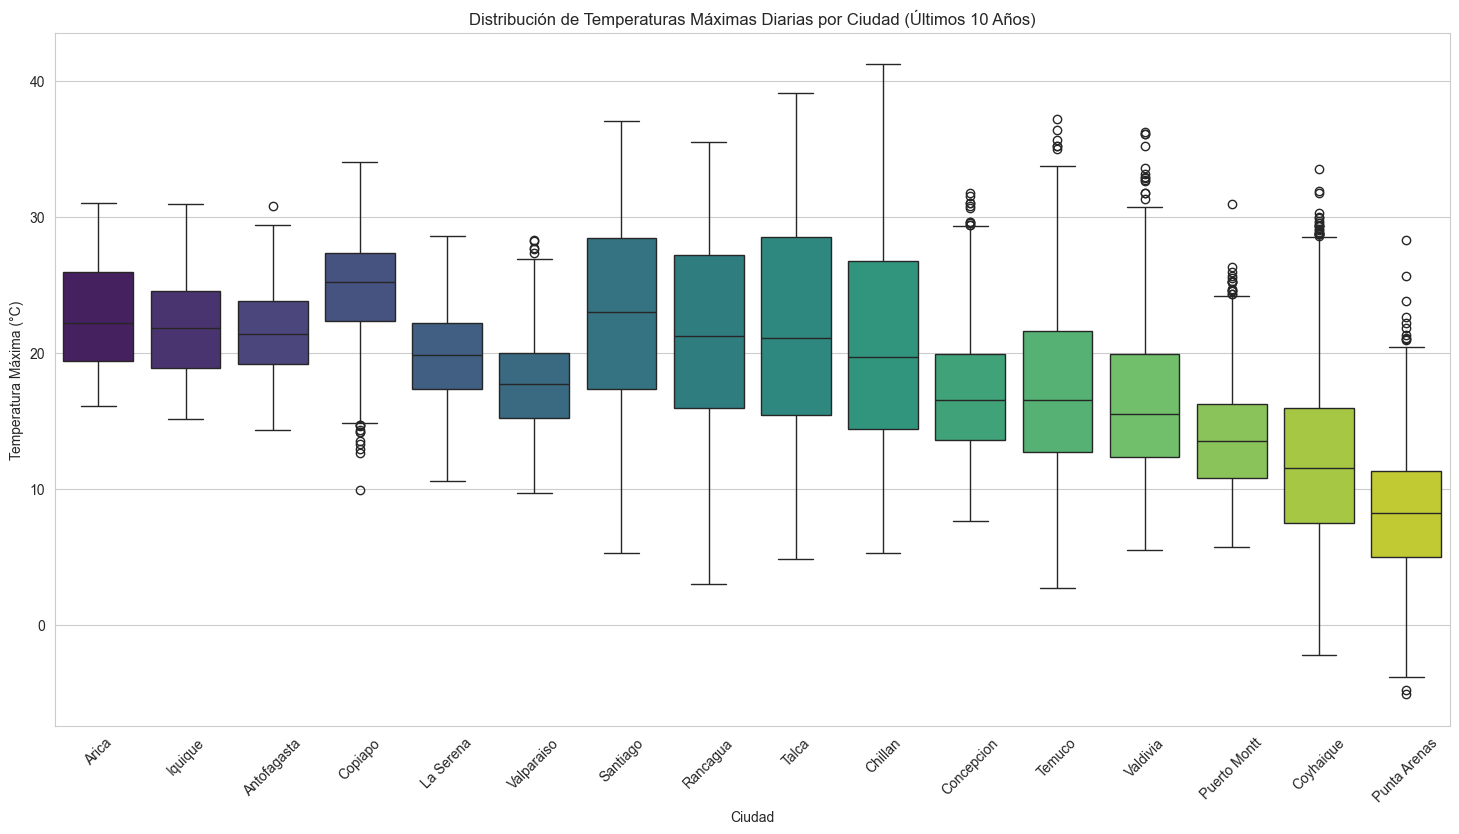

In [25]:
# Gráfico de Boxplot para Temperaturas Máximas por Ciudad
plt.figure(figsize=(18, 9))
sns.boxplot(data=df, x='ciudad', y='temp_max_c', palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribución de Temperaturas Máximas Diarias por Ciudad (Últimos 10 Años)')
plt.xlabel('Ciudad')
plt.ylabel('Temperatura Máxima (°C)')
plt.show()

2. **¿Cuál es el ciclo estacional de temperaturas de las ciudades?**

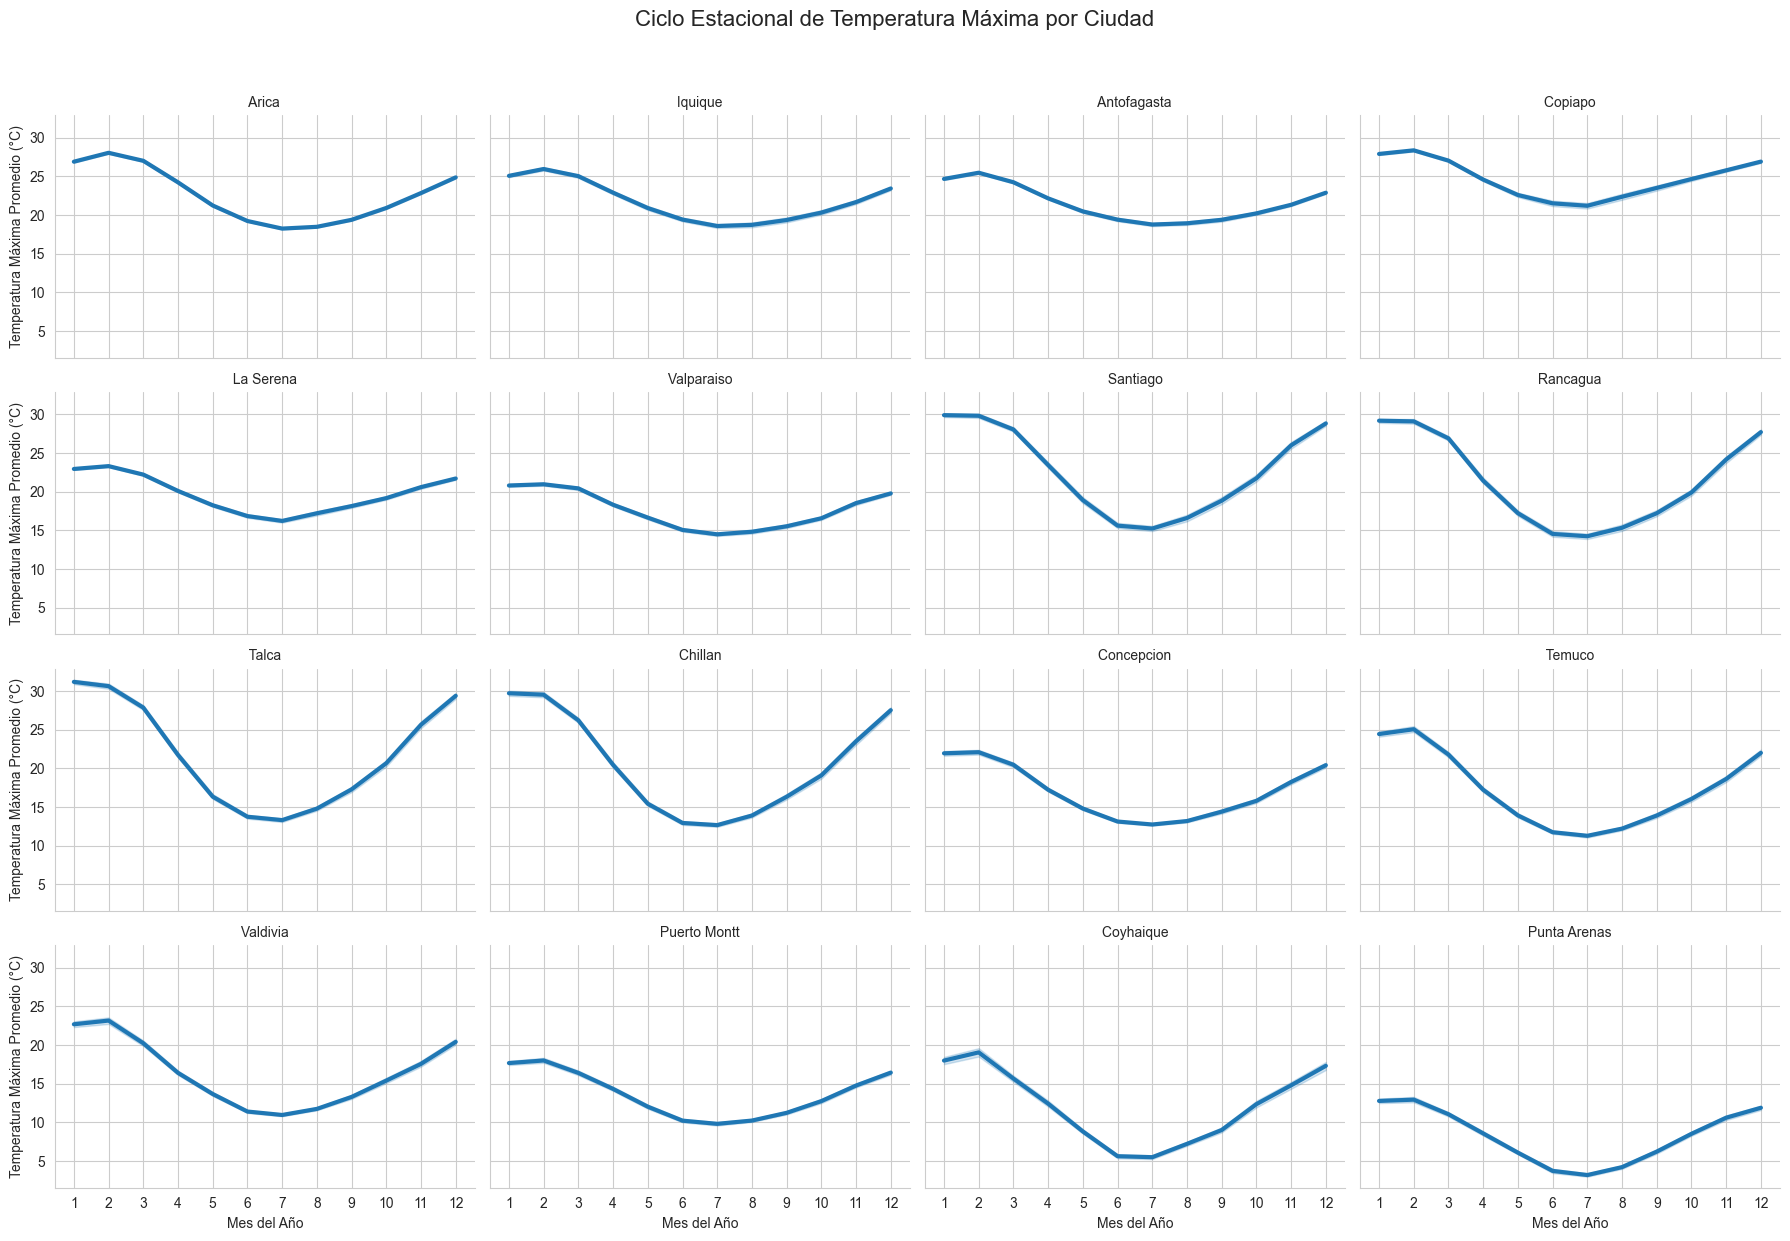

In [26]:
# Grilla de gráficos de línea
g = sns.relplot(
    data=df,
    x='mes',
    y='temp_max_c',
    col='ciudad',      # Crea una columna de gráficos para cada ciudad
    kind='line',       # Especifica que el tipo de gráfico es de línea
    col_wrap=4,        # Organiza los gráficos en 4 columnas
    height=3,          # Altura de cada gráfico individual
    aspect=1.5,        # Relación de aspecto para hacerlos más anchos que altos
    lw=3               # Grosor de la línea
)

# Personalización del gráfico
g.fig.suptitle('Ciclo Estacional de Temperatura Máxima por Ciudad', y=1.03, fontsize=16)
g.set_axis_labels("Mes del Año", "Temperatura Máxima Promedio (°C)")
g.set_titles(" {col_name} ") # Pone el nombre de la ciudad como título de cada sub-gráfico
g.set(xticks=range(1,13)) # Configura los ticks del eje X para cada sub-gráfico

plt.tight_layout()
plt.show()

3. **¿Ha cambiado el clima de las ciudades estos útimos 10 años?**

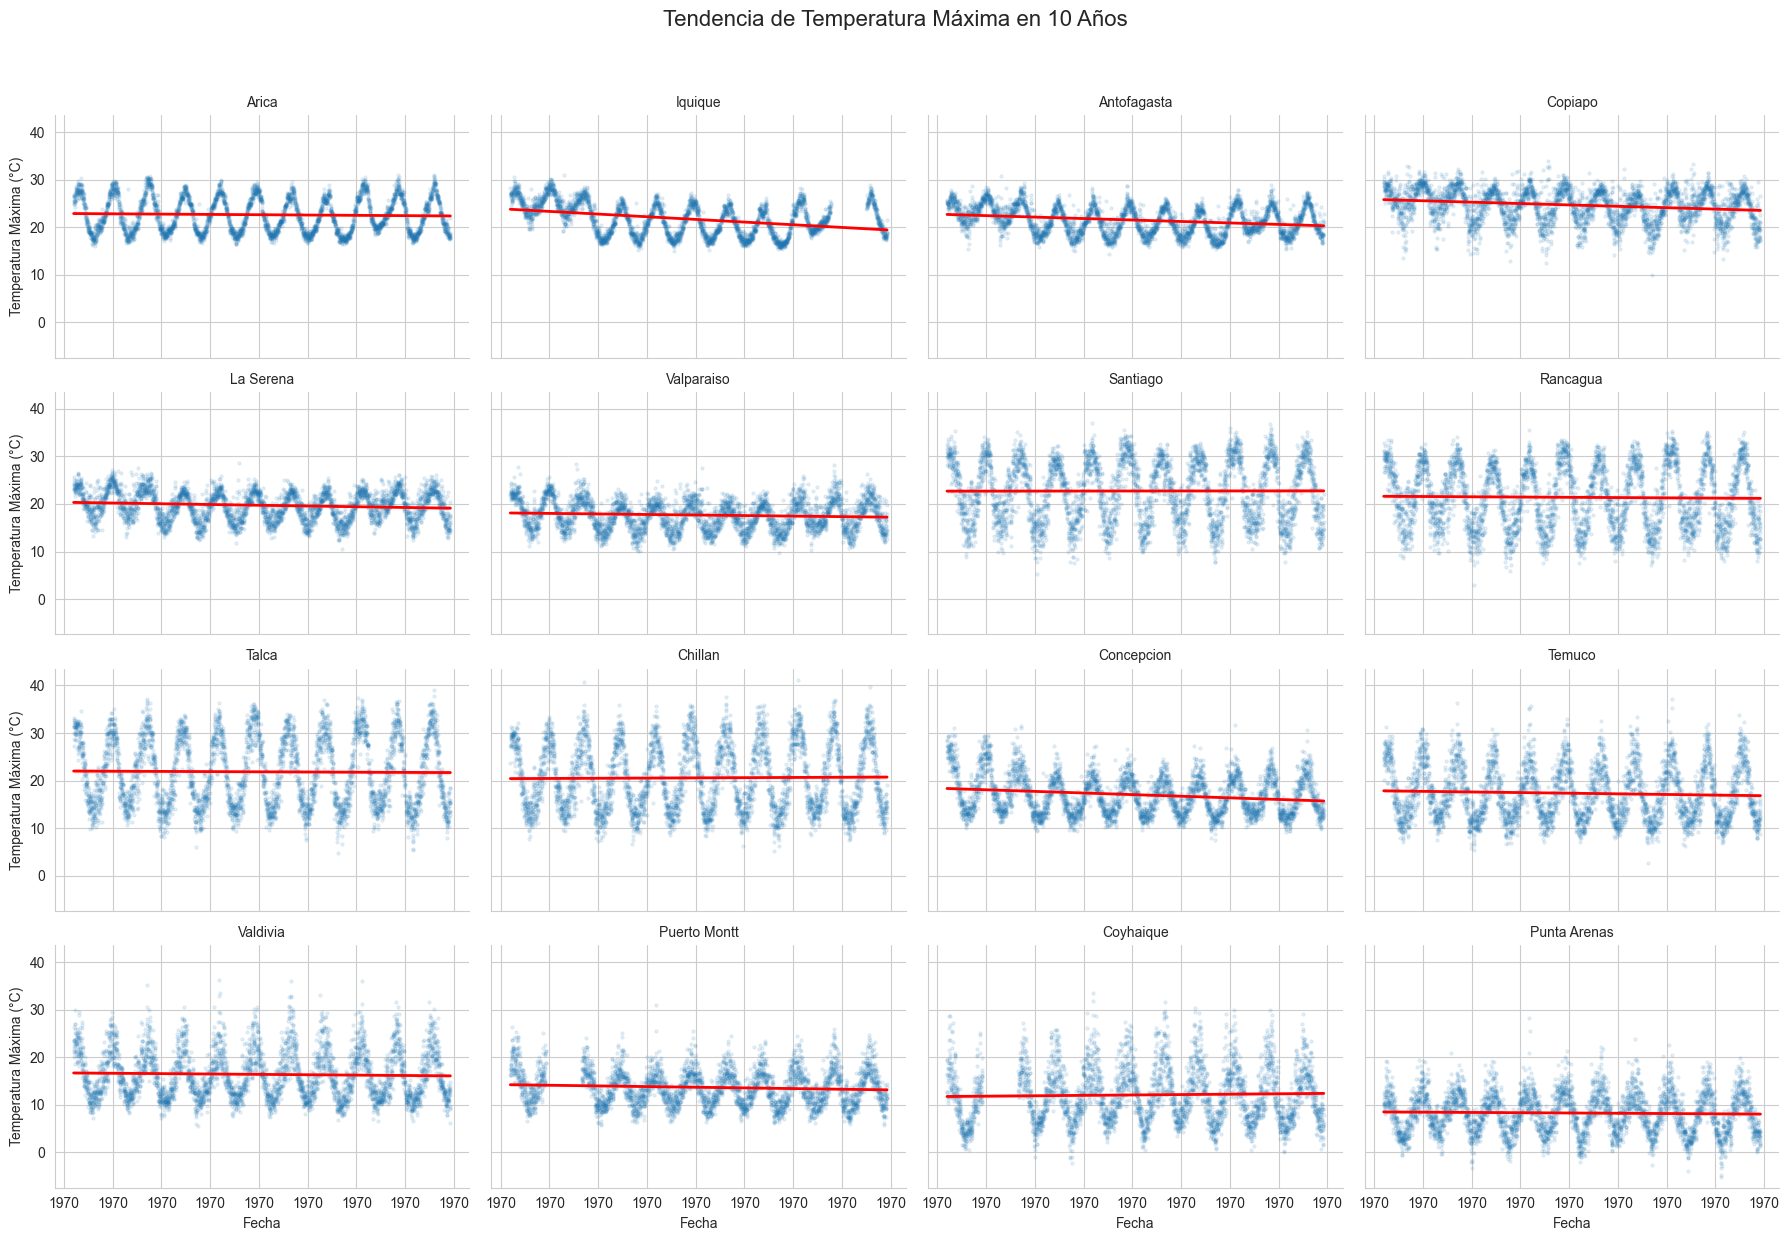

In [ ]:
# Gráfico de Tendencia de Temperatura Máxima a lo largo del tiempo
# Convierte la fecha a un número para poder hacer la regresión
df['fecha_ordinal'] = df['fecha'].apply(lambda x: x.toordinal())

# Usamos relplot
g = sns.lmplot(
    data=df,
    x='fecha_ordinal',
    y='temp_max_c',
    col='ciudad',
    col_wrap=4,
    height=3,
    aspect=1.5,
    # Argumentos para el scatter plot
    scatter_kws={'s': 5, 'alpha': 0.1},
    # Argumentos para la línea de regresión
    line_kws={'color': 'red', 'lw': 2}
)

# Personalización del gráfico
g.fig.suptitle('Tendencia de Temperatura Máxima en 10 Años', y=1.03, fontsize=16)
g.set_axis_labels("Fecha", "Temperatura Máxima (°C)")
g.set_titles("{col_name}")

# Formatear las etiquetas del eje X para mostrar el año
for ax in g.axes.flat:
    labels = [pd.to_datetime(int(label)).strftime('%Y') for label in ax.get_xticks() if label > 0]
    ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

4. **¿Qué tan inusual fue agúnl mes en particular en la ciudad de Santiago?**

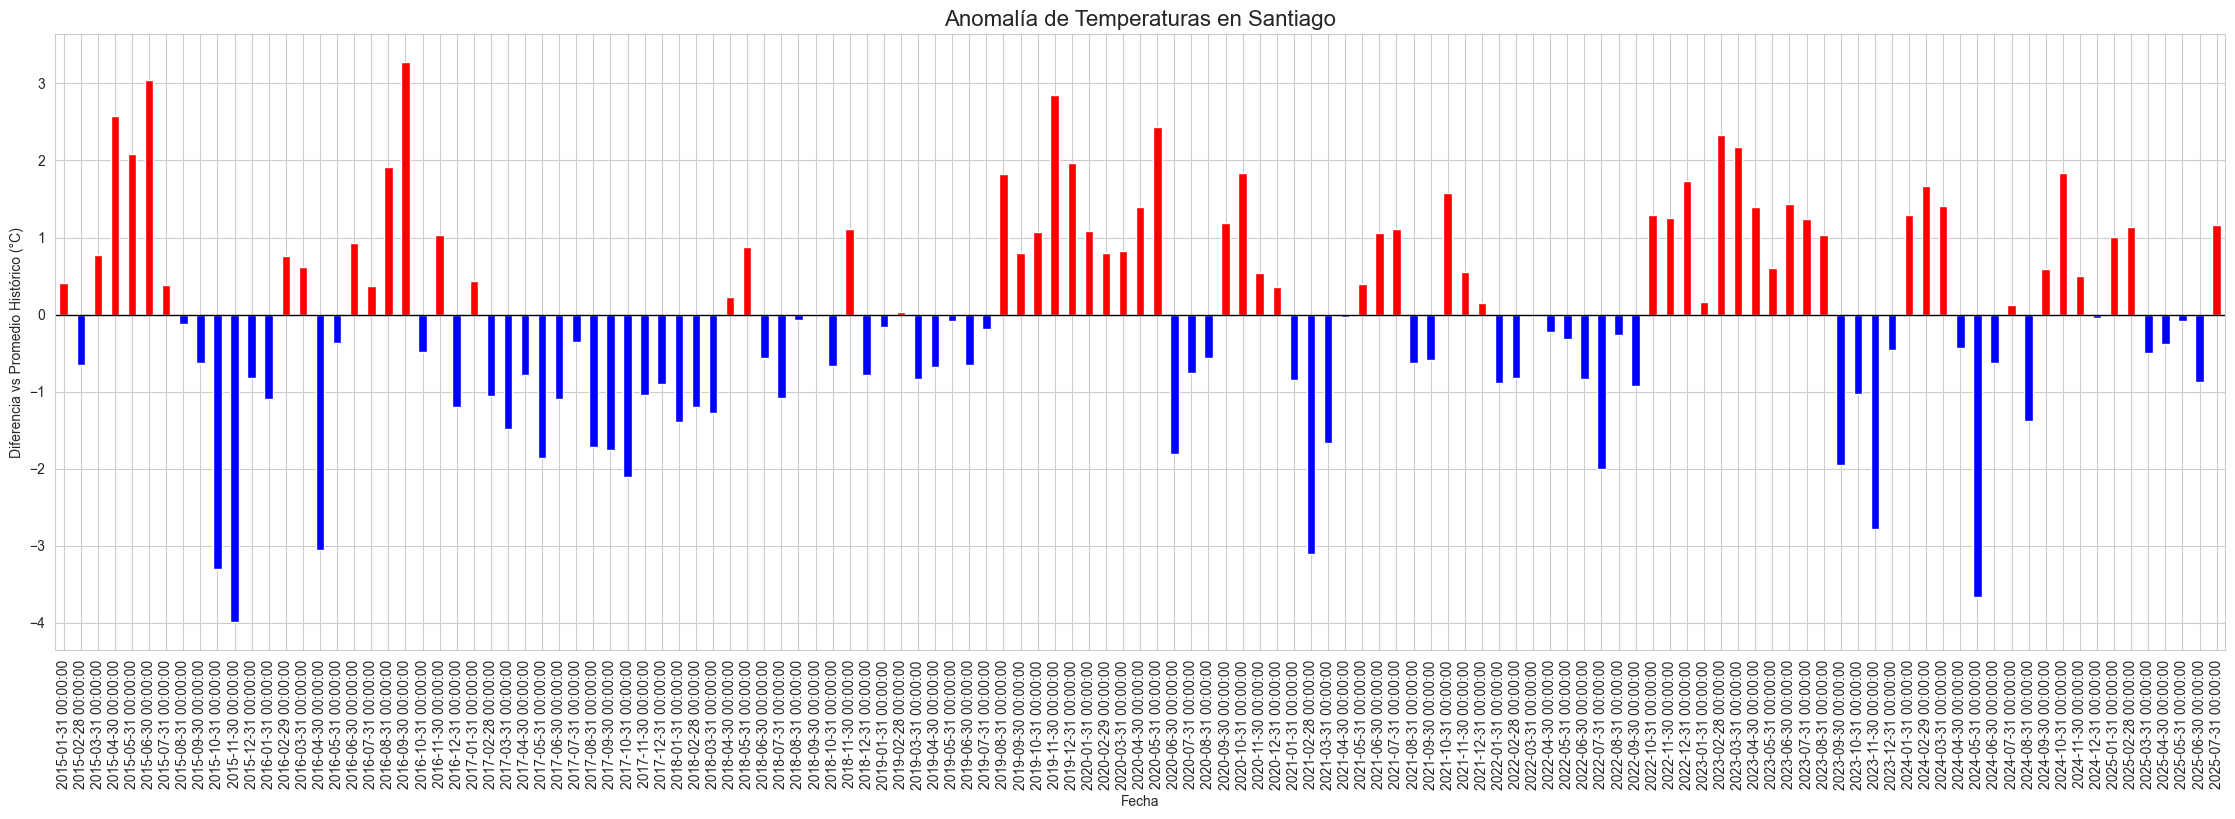

In [ ]:
# Filtrar los datos para la ciudad de Santiago
df_santiago = df[df['ciudad'] == 'Santiago'].copy()

# Calcular el promedio histórico para cada mes y usamos transform() para crear una nueva columna con este valor repetido
promedio_historico_mensual = df_santiago.groupby('mes')['temp_max_c'].transform('mean')
df_santiago['temp_promedio_historico'] = promedio_historico_mensual

# Calcular el promedio real de cada mes específico
df_mensual = df_santiago.set_index('fecha').resample('M').mean(numeric_only=True)

# Calcular la anomalía: la diferencia entre el promedio del mes y su promedio histórico
df_mensual['anomalia'] = df_mensual['temp_max_c'] - df_mensual['temp_promedio_historico']

# Graficar las anomalías
plt.figure(figsize=(28, 8))
# Colores diferentes para anomalías positivas (más cálido) y negativas (más frío)
df_mensual['anomalia'].plot(kind='bar', color=df_mensual['anomalia'].apply(lambda x: 'red' if x > 0 else 'blue'))

plt.title('Anomalía de Temperaturas en Santiago', fontsize=16)
plt.ylabel('Diferencia vs Promedio Histórico (°C)')
plt.xlabel('Fecha')
plt.axhline(0, color='black', lw=1)
plt.show()

5. **¿Cuántos días seguidos de calor extremo hemos tenido en los últimos 10 años en cada ciudad?** 

--- Iniciando Análisis de Olas de Calor para todas las ciudades ---

--- Resumen: Número total de olas de calor por ciudad (10 años) ---
ciudad
Talca           24
Temuco          23
Valdivia        23
Antofagasta     22
Arica           21
Coyhaique       19
Puerto Montt    18
Punta Arenas    18
Rancagua        18
Chillan         17
Concepcion      16
Iquique         15
Santiago        15
Valparaiso      14
La Serena       13
Copiapo         12
dtype: int64


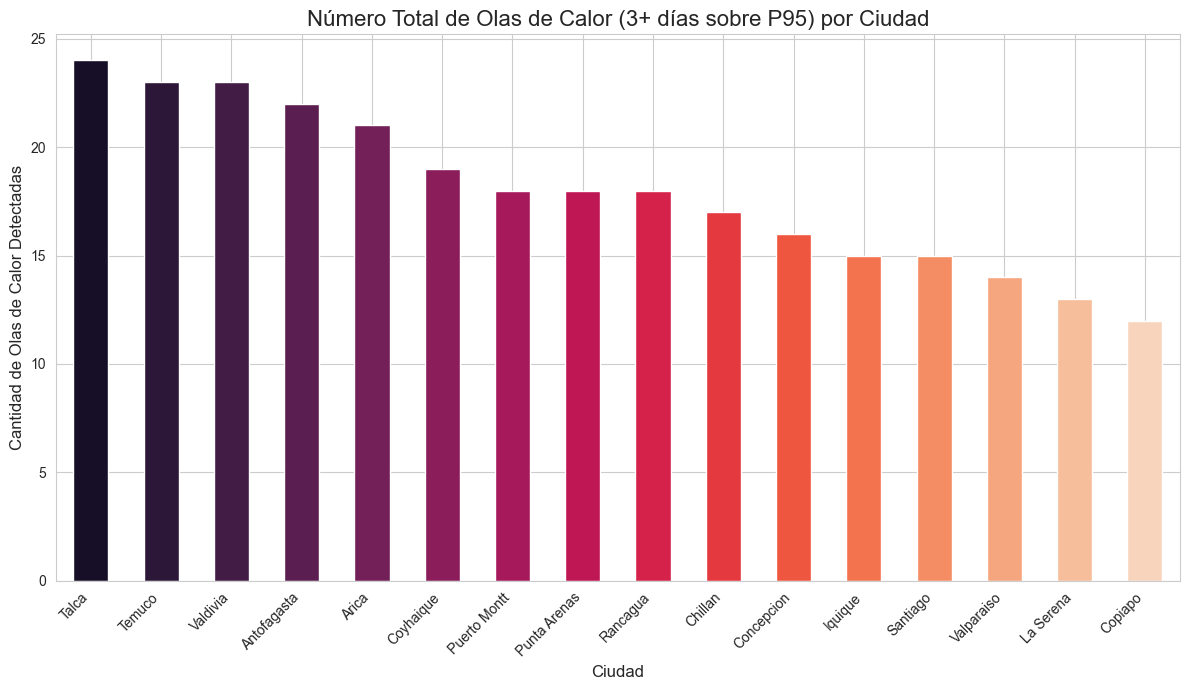

In [ ]:
# Calcular un umbral de calor para cada ciudad 
df['umbral_calor'] = df.groupby('ciudad')['temp_max_c'].transform(lambda x: x.quantile(0.95))

# Identificar los días que superan el umbral en su respectiva ciudad 
df['es_dia_caluroso'] = df['temp_max_c'] > df['umbral_calor']

# Identificar los bloques de días consecutivos DENTRO de cada ciudad
df['bloque_id'] = df.groupby('ciudad')['es_dia_caluroso'].transform(lambda x: (x != x.shift()).cumsum())

# Filtrar solo los días calurosos y calcular la duración de cada bloque 
df_dias_calurosos = df[df['es_dia_caluroso']]
duracion_eventos = df_dias_calurosos.groupby(['ciudad', 'bloque_id']).size()

# Filtrar los eventos que califican como "Olas de Calor" (3 o más días)
olas_de_calor = duracion_eventos[duracion_eventos >= 3]

# Crear un resumen final y visualizar
resumen_olas = olas_de_calor.groupby('ciudad').count().sort_values(ascending=False)

print("\n--- Resumen: Número total de olas de calor por ciudad (10 años) ---")
print(resumen_olas)

# Graficar el resumen
plt.figure(figsize=(12, 7))
resumen_olas.plot(kind='bar', color=sns.color_palette("rocket", len(resumen_olas)))
plt.title('Número Total de Olas de Calor (3+ días sobre P95) por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Cantidad de Olas de Calor Detectadas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. **¿Fue el 2024 de los años mas lluviosos en comparación a los años anteriores?**

Generando gráfico comparativo anual para todas las ciudades...


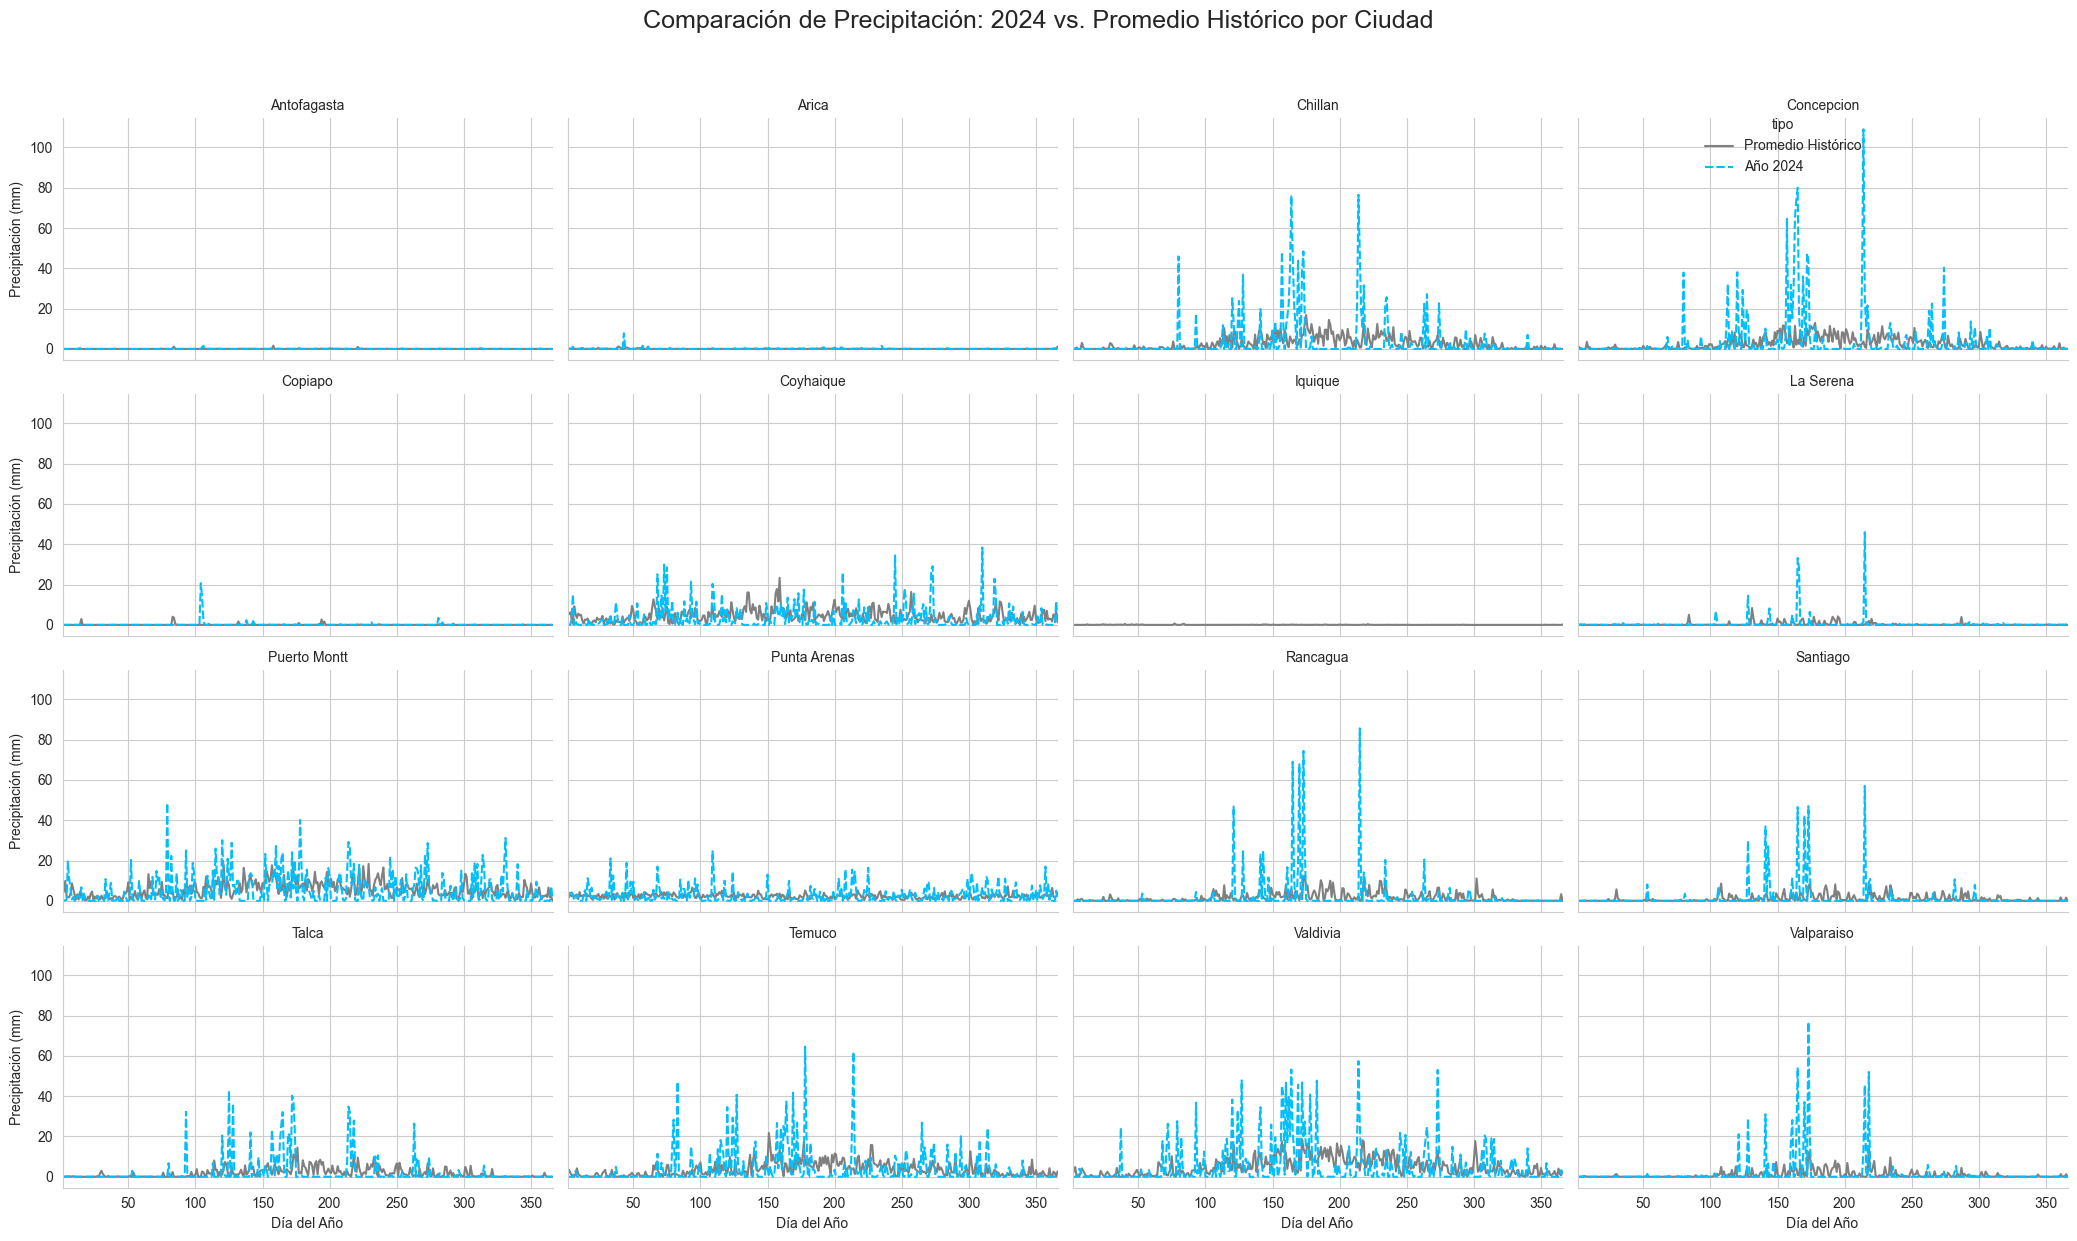

In [ ]:
# Promedio histórico para cada día del año en cada ciudad 
df_historico = df[df['año'] < 2024]
promedio_historico = df_historico.groupby(['ciudad', 'dia_del_año'])['precipitacion_mm'].mean().reset_index()
promedio_historico['tipo'] = 'Promedio Histórico' 

# Datos del año 2024 para cada ciudad: Usamos la suma diaria de precipitación para el año en curso
datos_2024 = df[df['año'] == 2024].groupby(['ciudad', 'dia_del_año'])['precipitacion_mm'].sum().reset_index()
datos_2024['tipo'] = 'Año 2024' # Añadimos su etiqueta

# Unir ambos dataframes en uno solo para facilitar el plot
promedio_historico.rename(columns={'precipitacion_mm': 'valor'}, inplace=True)
datos_2024.rename(columns={'precipitacion_mm': 'valor'}, inplace=True)

df_comparativo = pd.concat([promedio_historico, datos_2024])


# Crear el gráfico por facetas 
print("Generando gráfico comparativo anual para todas las ciudades...")

g = sns.relplot(
    data=df_comparativo,
    x='dia_del_año',
    y='valor',
    col='ciudad',         # Crea una columna de gráficos por ciudad
    hue='tipo',           # Crea una línea de color por cada 'tipo'
    style='tipo',         # Usa un estilo de línea diferente para cada 'tipo'
    kind='line',          # Gráfico de línea
    col_wrap=4,           # 4 gráficos por fila
    height=3,             # Altura de cada gráfico
    aspect=1.6,           # Relación de aspecto
    palette={'Promedio Histórico': 'grey', 'Año 2024': 'deepskyblue'}, # Colores personalizados
    legend='full'
)

# Personalización del gráfico
g.fig.suptitle('Comparación de Precipitación: 2024 vs. Promedio Histórico por Ciudad', y=1.03, fontsize=18)
g.set_axis_labels("Día del Año", "Precipitación (mm)")
g.set_titles("{col_name}")
g.set(xlim=(1, 366)) # Rango del eje X de 1 a 366

# Mover la leyenda a una posición más visible
sns.move_legend(g, "upper right", bbox_to_anchor=(.9, .95))

plt.tight_layout()
plt.show()

7. **¿Cuál es la forma de la distribución de temperaturas de cada ciudad? ¿Son climas con peaks muy marcados o más planos y consistentes?**

<Figure size 1800x1200 with 0 Axes>

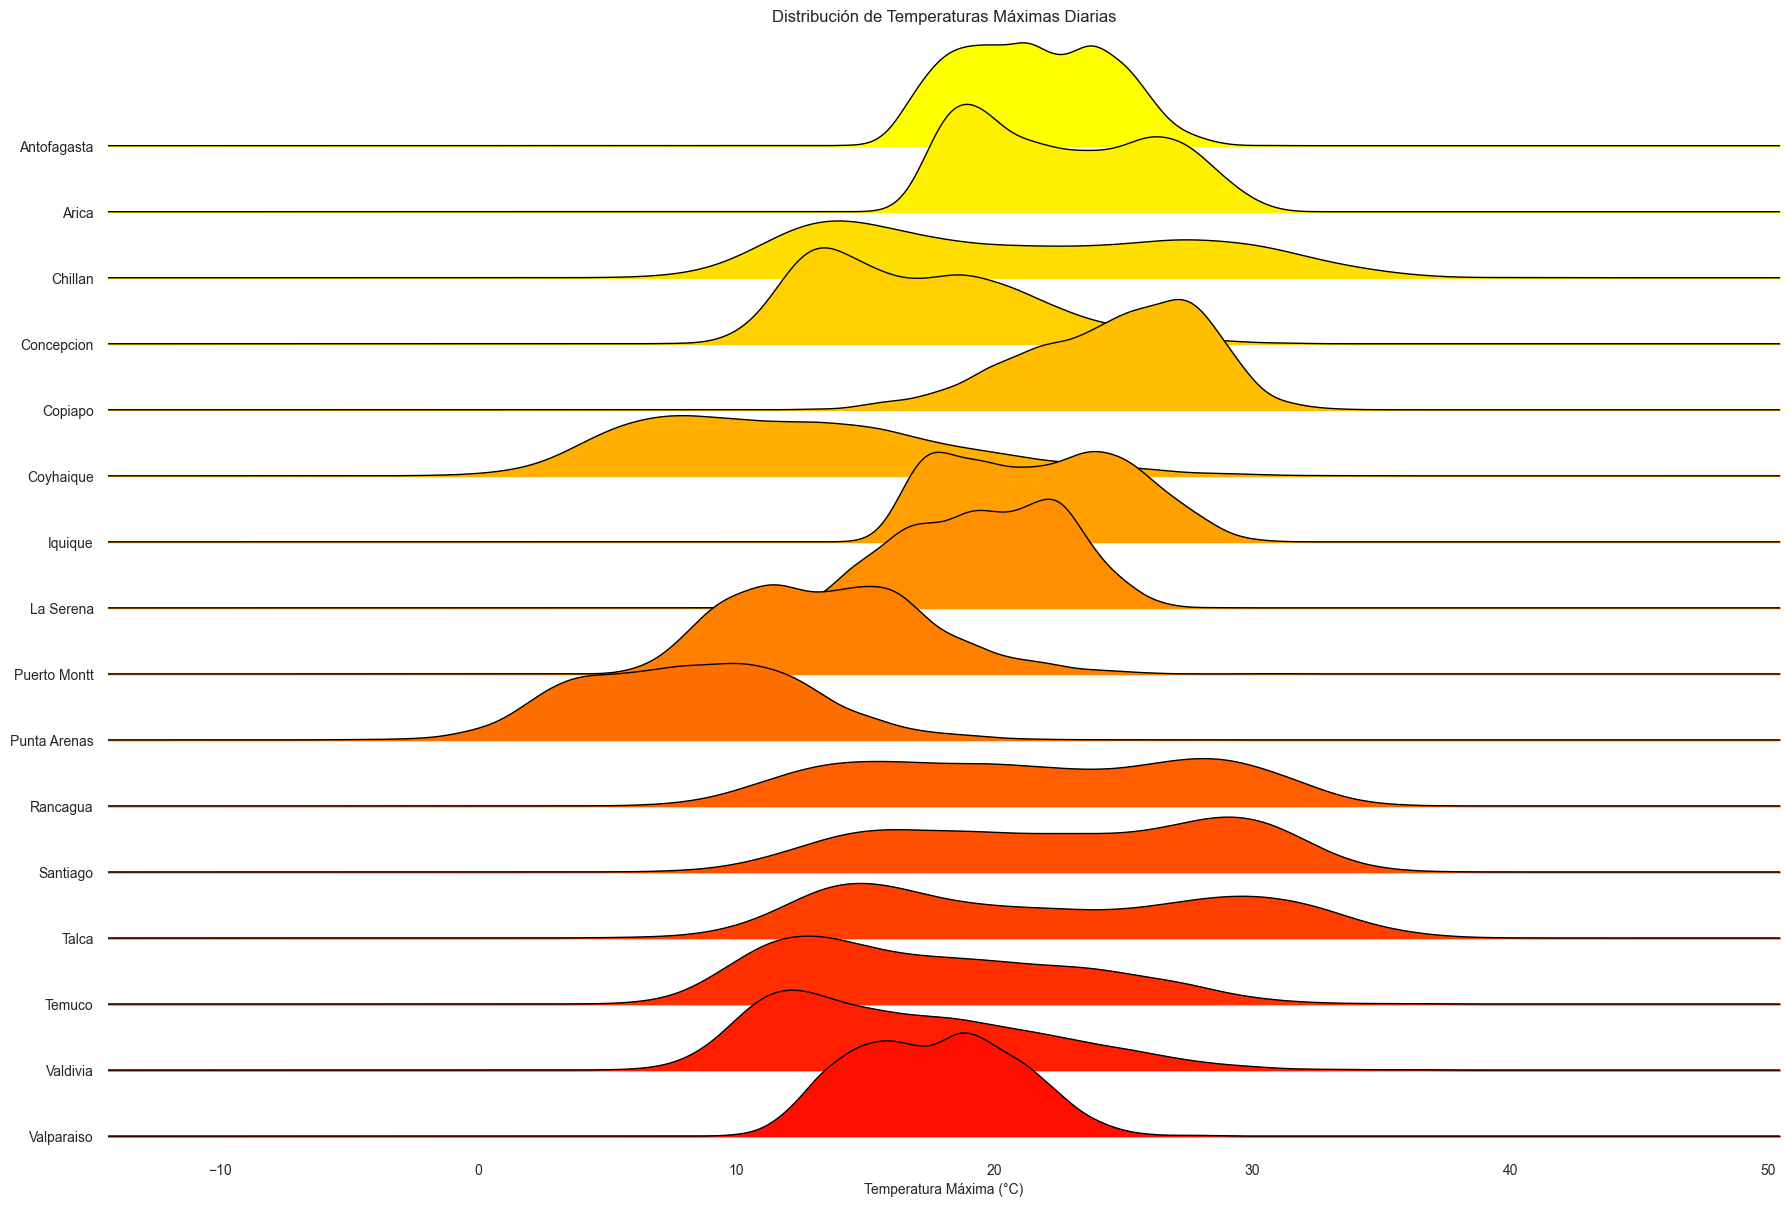

In [32]:
# Gráfico de Cresta (Ridgeline Plot) para Temperaturas Máximas Diarias por Ciudad
plt.figure(figsize=(18, 12))
fig, axes = joypy.joyplot(
    data=df,
    by='ciudad',
    column='temp_max_c',
    colormap=plt.cm.get_cmap('autumn_r'), # Paleta de colores cálidos
    linewidth=1,
    legend=False,
    figsize=(18, 12),
    title='Distribución de Temperaturas Máximas Diarias',
)

# Personalización del gráfico
plt.xlabel('Temperatura Máxima (°C)')
plt.show()

7. **¿En qué meses se registran los vientos más fuertes para cada ciudad y cómo se compara este patrón cíclico entre ellas?**

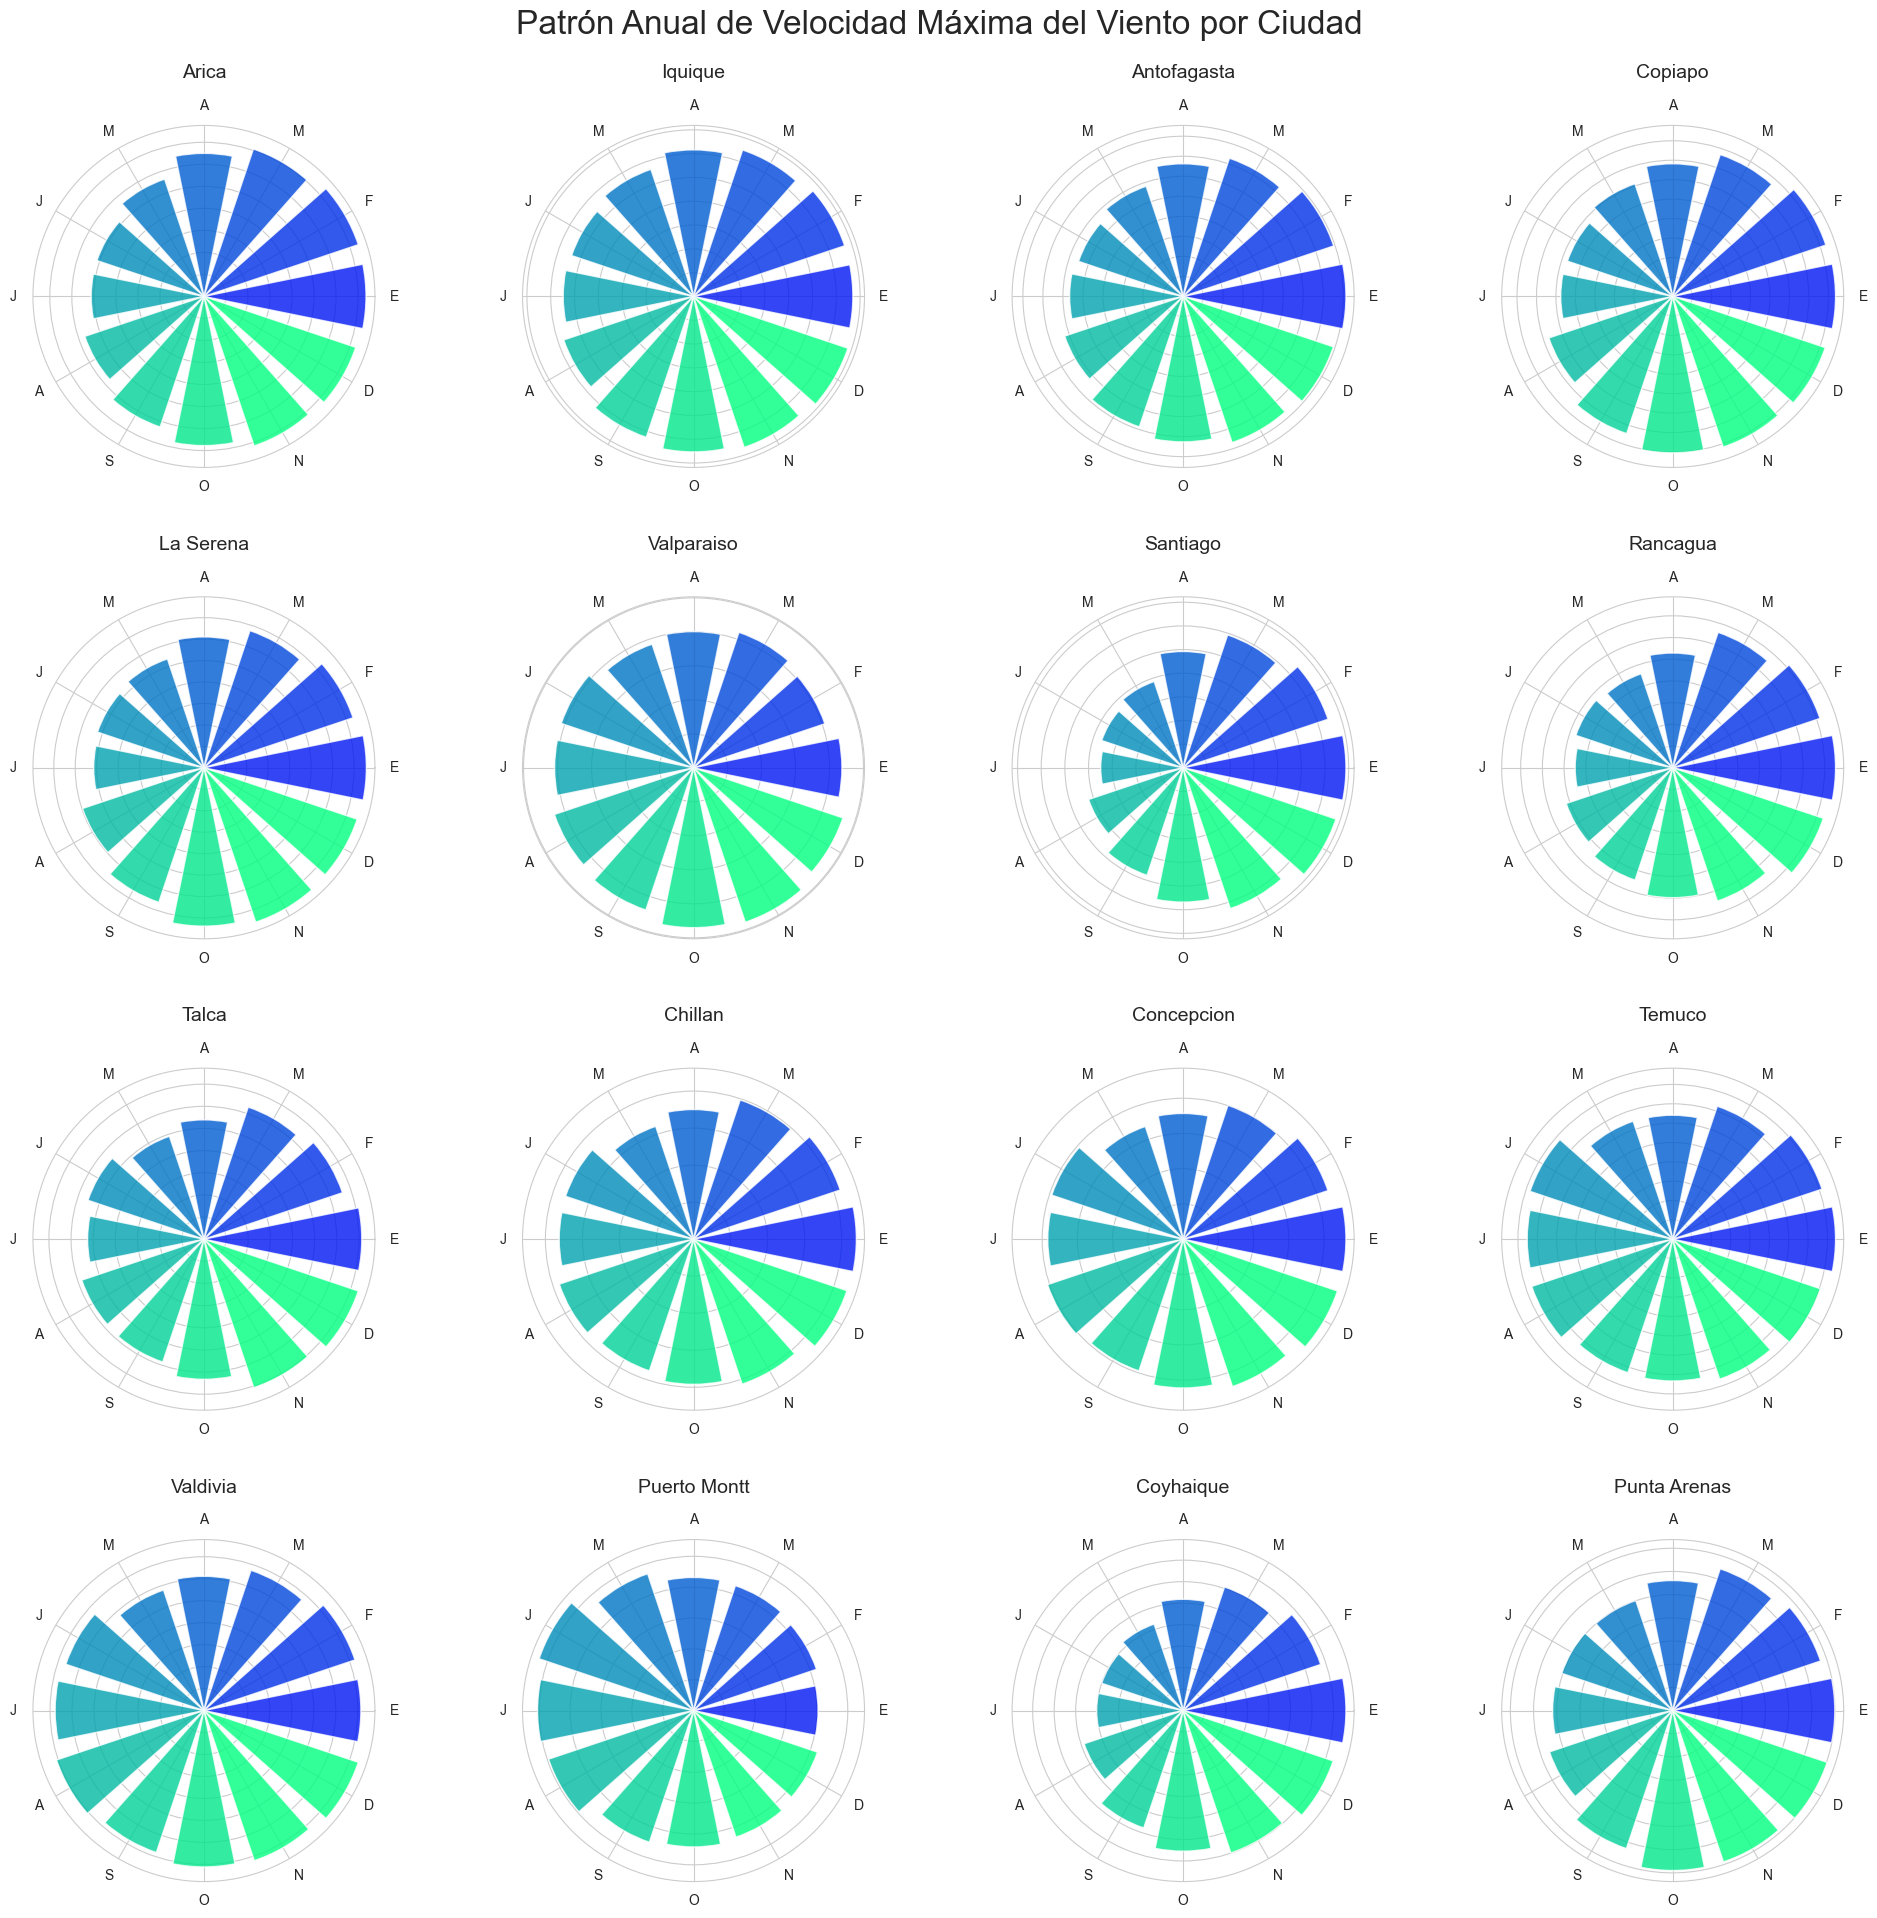

In [ ]:
# Calcular la velocidad máxima promedio del viento para cada mes en cada ciudad
df_viento_mensual = df.groupby(['ciudad', 'mes'])['viento_max_kmh'].mean().reset_index()

#  Crear una grilla de subgráficos con proyección polar organizando 16 ciudades en una grilla de 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20), subplot_kw={'projection': 'polar'})
axes = axes.flatten() # Aplanar la matriz de ejes para iterar fácilmente

# Colores para las barras
colors = plt.cm.get_cmap('winter', 12)

# Iterar sobre cada ciudad y su eje correspondiente
for i, ciudad in enumerate(df['ciudad'].unique()):
    ax = axes[i]
    data_ciudad = df_viento_mensual[df_viento_mensual['ciudad'] == ciudad]
    
    # Ángulos para cada barra (un círculo completo son 2*pi)
    angles = np.linspace(0, 2 * np.pi, 12, endpoint=False)
    
    # Dibujar las barras
    ax.bar(angles, data_ciudad['viento_max_kmh'], color=colors(data_ciudad['mes']), width=0.4, alpha=0.8)
    
    # Configuración del gráfico polar
    ax.set_title(ciudad, fontsize=14, pad=15)
    ax.set_xticks(angles)
    ax.set_xticklabels(['E', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    ax.tick_params(axis='y', labelsize=8) # Achicar los números del radio
    ax.set_yticklabels([]) # Ocultar los números del radio para más limpieza

fig.suptitle('Patrón Anual de Velocidad Máxima del Viento por Ciudad', fontsize=24, y=0.97)
plt.tight_layout(pad=3.0)
plt.show()